**Informations sur les données :**



Les données analysées comprennent un total de 411 patients, dont l'âge moyen est d'environ 50,5 ans, avec un écart-type de 9,4 ans. La plupart des patients sont de sexe masculin, représentant environ 65 % de l'échantillon. En ce qui concerne la douleur thoracique (chest_pain), les patients présentent en moyenne un niveau de douleur modérée (2,76 sur une échelle de 1 à 4), avec une répartition assez uniforme entre les différents niveaux de douleur. Cependant, il est à noter que tous les patients inclus dans cette analyse ne présentent pas de maladie cardiaque, ce qui est indiqué par la colonne "has_heart_disease" ayant une valeur constante de 0 pour tous les patients de l'échantillon. L'âge des patients varie entre 28 et 76 ans, avec un quartile supérieur à 57 ans, ce qui indique une distribution relativement large de l'âge au sein de l'échantillon.


**Notre projet :**

Dans notre projet, nous allons explorer et analyser en profondeur les données médicales disponibles pour détecter les maladies cardiaques chez les patients. Notre démarche comprend plusieurs étapes essentielles. Tout d'abord, nous allons explorer les données pour en comprendre la structure, les distributions, et les relations entre les variables. Cela inclut des analyses de la distribution des attributs et de la matrice de corrélation pour identifier les relations entre les différents facteurs médicaux. Ensuite, nous allons procéder au prétraitement des données, notamment en encodant les attributs catégoriels, en divisant les données en ensembles d'entraînement et de test, et en normalisant les valeurs si nécessaire. En parallèle, nous allons construire plusieurs modèles de classification, notamment la Régression Logistique, les K Plus Proches Voisins, les Forêts Aléatoires, les Arbres de Décision et les Machines à Vecteurs de Support (SVM). Nous importerons ces modèles, ajusterons leurs hyperparamètres, les entraînerons sur les données d'entraînement, et les évaluerons en utilisant diverses métriques pour déterminer le modèle le plus performant dans la détection des maladies cardiaques.

#  __Classification__ 
## 1. _Exploration des donnees_
### 1.1 Comprendre les donnees 

In [1]:
# importation de bibliothèques
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
#lire des données dans le dataframe
df = pd.read_csv('heart_disease.csv',sep=',')

In [3]:
# affichage des cinq premières lignes
df.head()

,site,age,is_male,chest_pain,rest_blood_press,cholesterol,high_blood_sugar,rest_ecg,max_heart_rate,exer_angina,ST_depression,Peak_ST_seg,major_vessels,thal,has_heart_disease
0,cleve,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,cleve,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,cleve,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,cleve,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,cleve,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
# résumé concis de dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   site               920 non-null    object
 1   age                920 non-null    int64 
 2   is_male            920 non-null    int64 
 3   chest_pain         920 non-null    int64 
 4   rest_blood_press   920 non-null    object
 5   cholesterol        920 non-null    object
 6   high_blood_sugar   920 non-null    object
 7   rest_ecg           920 non-null    object
 8   max_heart_rate     920 non-null    object
 9   exer_angina        920 non-null    object
 10  ST_depression      920 non-null    object
 11  Peak_ST_seg        920 non-null    object
 12  major_vessels      920 non-null    object
 13  thal               920 non-null    object
 14  has_heart_disease  920 non-null    int64 
dtypes: int64(4), object(11)
memory usage: 107.9+ KB


In [5]:
# vérification des valeurs nulles
df.isnull().sum()

site                 0
age                  0
is_male              0
chest_pain           0
rest_blood_press     0
cholesterol          0
high_blood_sugar     0
rest_ecg             0
max_heart_rate       0
exer_angina          0
ST_depression        0
Peak_ST_seg          0
major_vessels        0
thal                 0
has_heart_disease    0
dtype: int64

In [6]:
#convertire '?' au 'valeur nulle'
df=df.replace('?', np.NaN)

In [7]:
# vérification des valeurs nulles
df.isnull().sum()

site                   0
age                    0
is_male                0
chest_pain             0
rest_blood_press      59
cholesterol           30
high_blood_sugar      90
rest_ecg               2
max_heart_rate        55
exer_angina           55
ST_depression         62
Peak_ST_seg          309
major_vessels        611
thal                 486
has_heart_disease      0
dtype: int64

In [8]:
df.isna()

,site,age,is_male,chest_pain,rest_blood_press,cholesterol,high_blood_sugar,rest_ecg,max_heart_rate,exer_angina,ST_depression,Peak_ST_seg,major_vessels,thal,has_heart_disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
916,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
917,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
918,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [9]:
# suppression de la colonne 'site'
df.drop('site',axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                920 non-null    int64 
 1   is_male            920 non-null    int64 
 2   chest_pain         920 non-null    int64 
 3   rest_blood_press   861 non-null    object
 4   cholesterol        890 non-null    object
 5   high_blood_sugar   830 non-null    object
 6   rest_ecg           918 non-null    object
 7   max_heart_rate     865 non-null    object
 8   exer_angina        865 non-null    object
 9   ST_depression      858 non-null    object
 10  Peak_ST_seg        611 non-null    object
 11  major_vessels      309 non-null    object
 12  thal               434 non-null    object
 13  has_heart_disease  920 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 100.8+ KB


In [11]:
df.shape

(920, 14)

In [12]:
# statistiques descriptives des données
df.describe()

,age,is_male,chest_pain,has_heart_disease
count,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,0.995652
std,9.424685,0.408148,0.930969,1.142693
min,28.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,1.000000
75%,60.000000,1.000000,4.000000,2.000000
max,77.000000,1.000000,4.000000,4.000000


In [13]:
df[['age']].describe()

,age
count,920.000000
mean,53.510870
std,9.424685
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


In [14]:
df[df.has_heart_disease==0].describe()

,age,is_male,chest_pain,has_heart_disease
count,411.000000,411.000000,411.000000,411.0
mean,50.547445,0.649635,2.761557,0.0
std,9.433700,0.477666,0.903425,0.0
min,28.000000,0.000000,1.000000,0.0
25%,43.000000,0.000000,2.000000,0.0
50%,51.000000,1.000000,3.000000,0.0
75%,57.000000,1.000000,4.000000,0.0
max,76.000000,1.000000,4.000000,0.0


In [15]:
df[df.has_heart_disease==1].describe()

,age,is_male,chest_pain,has_heart_disease
count,265.000000,265.000000,265.000000,265.0
mean,53.528302,0.886792,3.581132,1.0
std,8.740371,0.317446,0.813023,0.0
min,31.000000,0.000000,1.000000,1.0
25%,48.000000,1.000000,3.000000,1.0
50%,55.000000,1.000000,4.000000,1.0
75%,59.000000,1.000000,4.000000,1.0
max,75.000000,1.000000,4.000000,1.0


In [16]:
df[df.has_heart_disease==2].describe()

,age,is_male,chest_pain,has_heart_disease
count,109.000000,109.000000,109.000000,109.0
mean,57.577982,0.908257,3.724771,2.0
std,7.786852,0.289996,0.678664,0.0
min,38.000000,0.000000,1.000000,2.0
25%,52.000000,1.000000,4.000000,2.0
50%,58.000000,1.000000,4.000000,2.0
75%,63.000000,1.000000,4.000000,2.0
max,74.000000,1.000000,4.000000,2.0


In [17]:
df[df.has_heart_disease==3].describe()


,age,is_male,chest_pain,has_heart_disease
count,107.000000,107.000000,107.000000,107.0
mean,59.214953,0.925234,3.691589,3.0
std,7.990594,0.264252,0.664621,0.0
min,35.000000,0.000000,1.000000,3.0
25%,54.000000,1.000000,4.000000,3.0
50%,60.000000,1.000000,4.000000,3.0
75%,64.500000,1.000000,4.000000,3.0
max,77.000000,1.000000,4.000000,3.0


In [18]:
df[df.has_heart_disease==4].describe()


,age,is_male,chest_pain,has_heart_disease
count,28.000000,28.000000,28.000000,28.0
mean,59.214286,0.928571,3.750000,4.0
std,8.283661,0.262265,0.645497,0.0
min,38.000000,0.000000,1.000000,4.0
25%,55.750000,1.000000,4.000000,4.0
50%,59.000000,1.000000,4.000000,4.0
75%,63.250000,1.000000,4.000000,4.0
max,77.000000,1.000000,4.000000,4.0


### 1.2 visualisation des donnees 
#### destribution des donnees attribut etiqutes 

<Axes: xlabel='has_heart_disease', ylabel='count'>

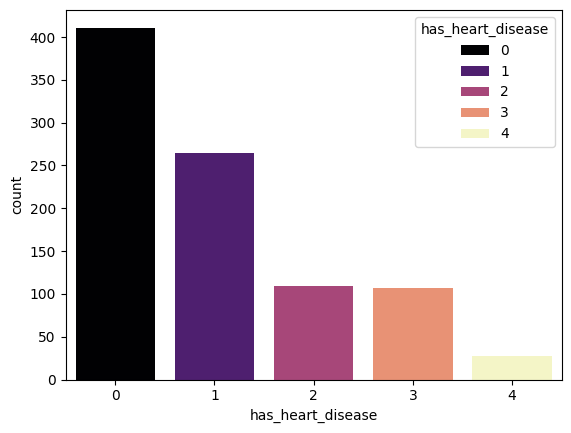

In [19]:
sns.countplot(x="has_heart_disease", hue="has_heart_disease", data=df, palette='magma')

#### Matrie de correlation

<Axes: >

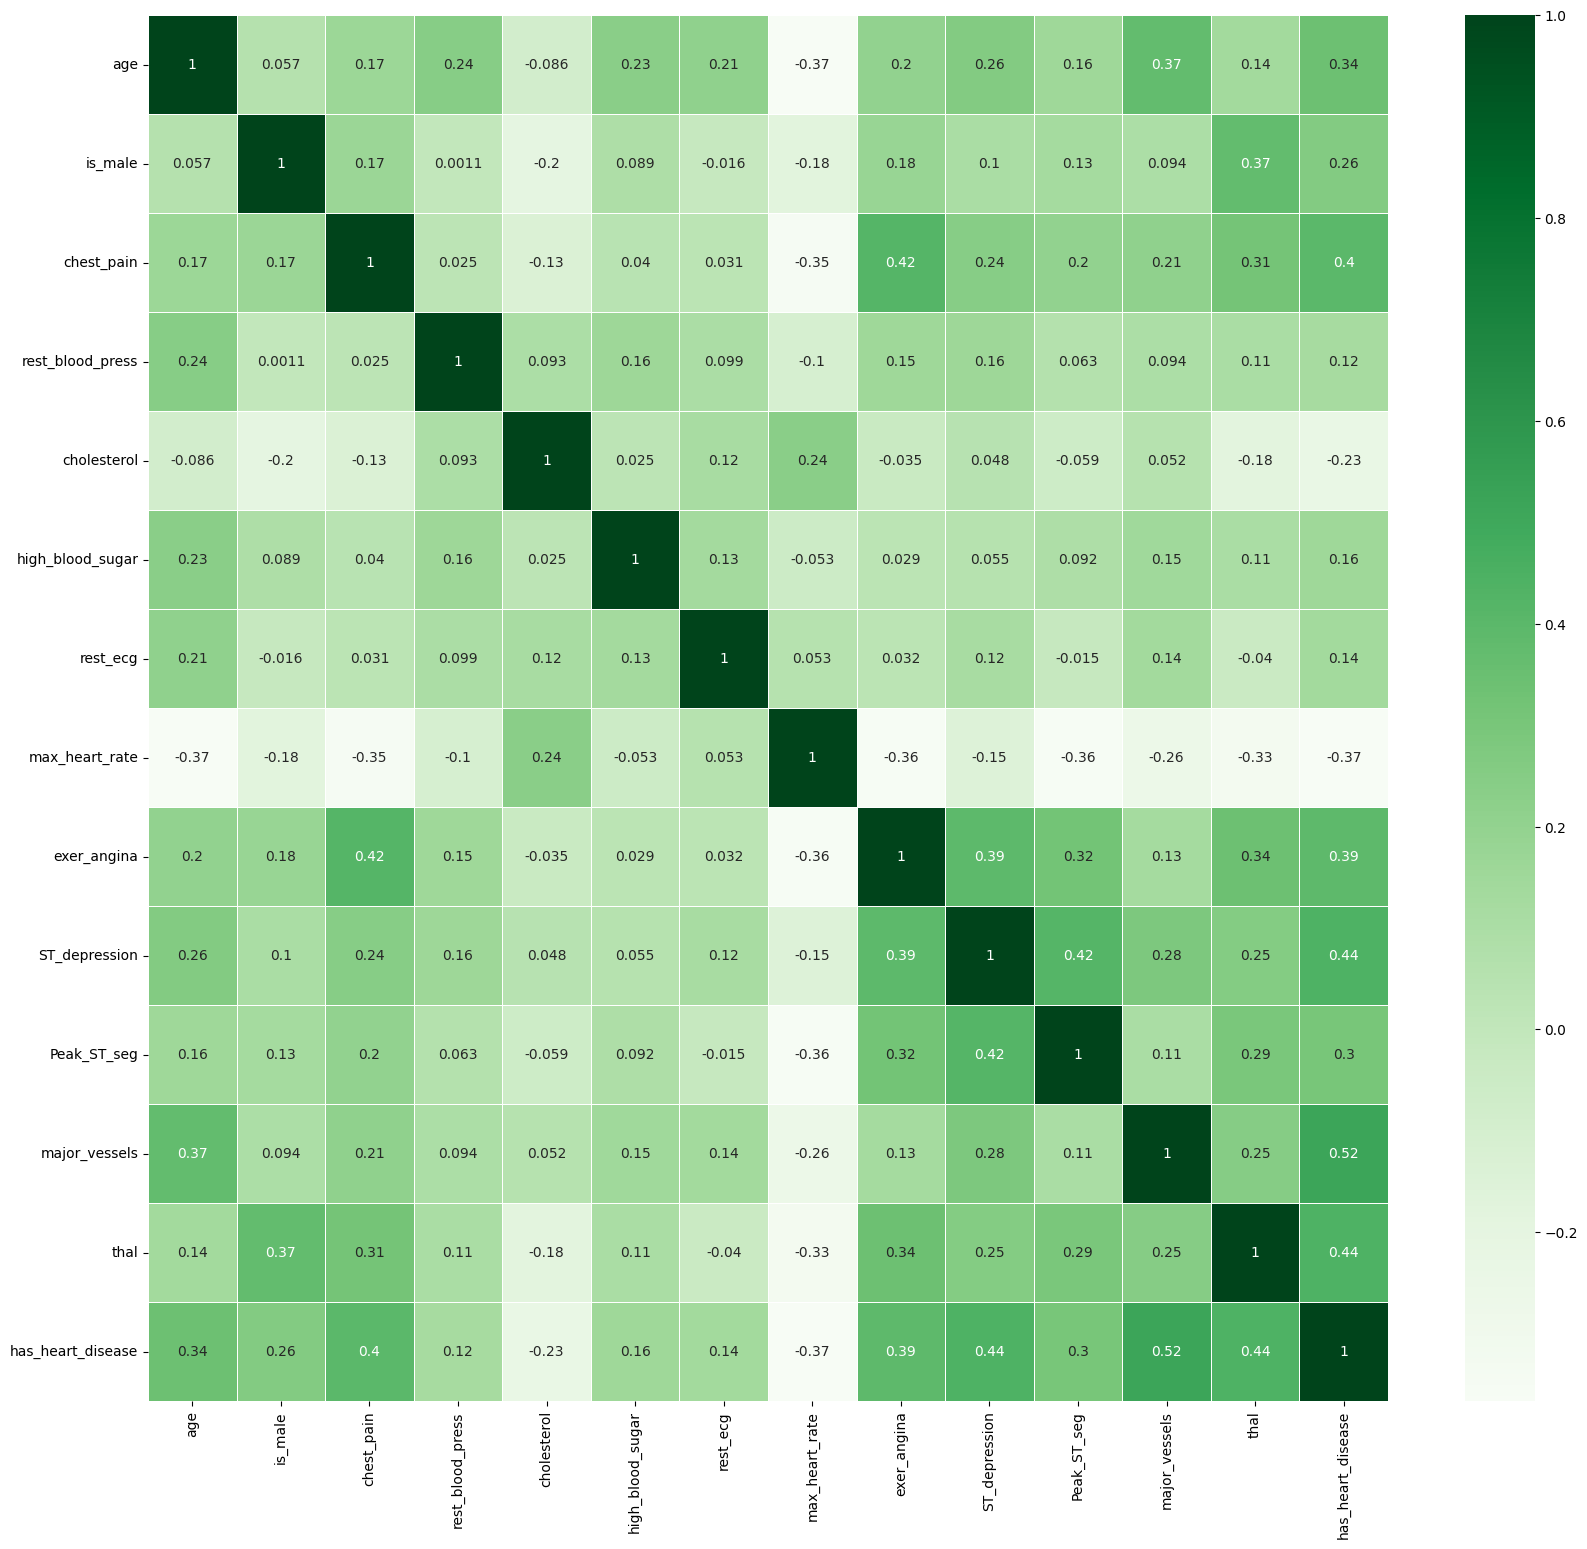

In [20]:
# heatmap
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="Greens")

#### Les courbes des nuages de points

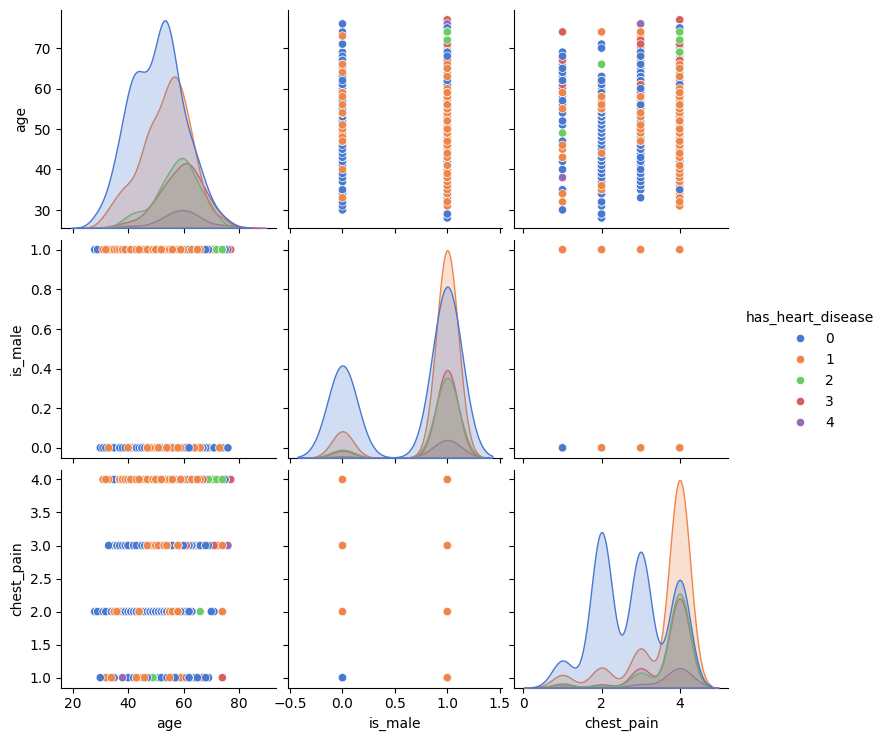

In [21]:
sns.pairplot(df, hue='has_heart_disease', palette='muted')

# 2. Prétraitement des données et construction de modèles
## 2.1 Prétraitement des données ou Encodage des attributs categorielles

In [22]:
# Nombre de lignes uniques dans la colonne "has_heart_disease".
df['has_heart_disease'].value_counts()

has_heart_disease
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [25]:
df_clean = df.dropna()

### 2.2 Diviser les données en données de formation et de test

In [26]:
from sklearn.model_selection import train_test_split

X=  df_clean.drop('has_heart_disease', axis=1)
Y= df_clean['has_heart_disease']
# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                X,
                Y,
                test_size=0.2,
                random_state=84)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)



Shape of training set: (239, 13)
Shape of test set: (60, 13)


### normaliser les données d'entraînement 

In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

## 2.3 Classification Models
### 2.3.1 Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Création et entraînement du modèle
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Génération des prédictions pour les données de test
predictions1 = logreg.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1, zero_division=1))

Confusion Matrix: 
 [[33  1  0  0  0]
 [ 1  3  2  0  1]
 [ 2  2  4  2  0]
 [ 2  0  3  3  1]
 [ 0  0  0  0  0]]


              precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.50      0.43      0.46         7
           2       0.44      0.40      0.42        10
           3       0.60      0.33      0.43         9
           4       0.00      1.00      0.00         0

    accuracy                           0.72        60
   macro avg       0.48      0.63      0.45        60
weighted avg       0.71      0.72      0.71        60



In [28]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.7166666666666667


#### nous avons suivi les étapes du TP réalisé en cours pour développer nos modèles, tout en explorant et intégrant de nouvelles méthodes visant à améliorer le pourcentage d'exactitude.

### Intégration de Méthodes Innovantes pour Maximiser l'Exactitude des Modèles

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import uniform
import warnings
warnings.simplefilter(action='ignore')


# Définition des hyperparamètres à optimiser avec une grille plus large
param_dist = {
    'C': uniform(0.1, 10),  # Distribution uniforme pour C
    'penalty': ['l1', 'l2'],  # Choix de la norme de régularisation
    'solver': ['liblinear', 'saga']  # Choix de l'algorithme de résolution
}

# Créer un modèle LogisticRegression
lr = LogisticRegression()

# Recherche aléatoire avec validation croisée plus fine (cv=10)
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist, n_iter=100, cv=10)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019602FF9390>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']})

In [30]:
# Meilleurs hyperparamètres trouvés
best_params_lr_random = random_search.best_params_
print("Best Parameters for Logistic Regression (RandomizedSearchCV):", best_params_lr_random)

# Utilisation des meilleurs hyperparamètres pour créer le modèle
best_lr_random = LogisticRegression(**best_params_lr_random)
best_lr_random.fit(X_train, y_train)
predictions_best_lr_random = best_lr_random.predict(X_test)

# Évaluation du modèle avec les meilleurs hyperparamètres trouvés par RandomizedSearchCV
print("Confusion Matrix for Logistic Regression (RandomizedSearchCV): \n", confusion_matrix(y_test, predictions_best_lr_random))
print("\n")
print(classification_report(y_test, predictions_best_lr_random))

Best Parameters for Logistic Regression (RandomizedSearchCV): {'C': 0.8286335249104358, 'penalty': 'l1', 'solver': 'saga'}
Confusion Matrix for Logistic Regression (RandomizedSearchCV): 
 [[34  0  0  0  0]
 [ 1  4  1  1  0]
 [ 2  2  4  2  0]
 [ 2  0  4  2  1]
 [ 0  0  0  0  0]]


              precision    recall  f1-score   support

           0       0.87      1.00      0.93        34
           1       0.67      0.57      0.62         7
           2       0.44      0.40      0.42        10
           3       0.40      0.22      0.29         9
           4       0.00      0.00      0.00         0

    accuracy                           0.73        60
   macro avg       0.48      0.44      0.45        60
weighted avg       0.71      0.73      0.71        60



In [31]:
best_lr_random_acc = accuracy_score(y_test, predictions_best_lr_random)
print("Accuracy of Best Logistic Regression Model (RandomizedSearchCV) is: ", best_lr_random_acc)


Accuracy of Best Logistic Regression Model (RandomizedSearchCV) is:  0.7333333333333333


### 2.3.2 K Nearest Neighbours

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# pour trouver la valeur qui présente l'erreur moyenne la plus fa
error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

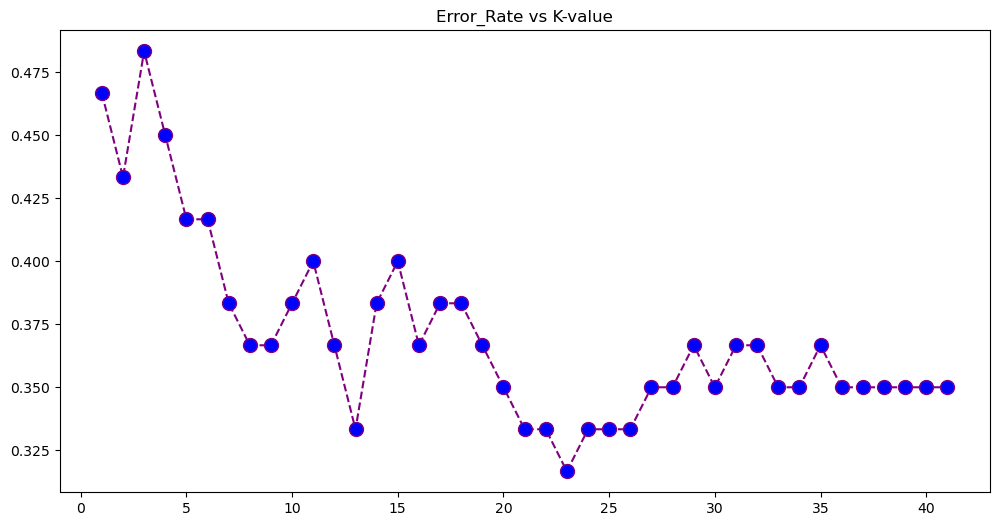

In [34]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [36]:
print(confusion_matrix(y_test, predictions2))
print("\n")

print(classification_report(y_test, predictions2, zero_division=1))


[[34  0  0  0]
 [ 2  4  0  1]
 [ 3  4  3  0]
 [ 4  4  1  0]]


              precision    recall  f1-score   support

           0       0.79      1.00      0.88        34
           1       0.33      0.57      0.42         7
           2       0.75      0.30      0.43        10
           3       0.00      0.00      0.00         9

    accuracy                           0.68        60
   macro avg       0.47      0.47      0.43        60
weighted avg       0.61      0.68      0.62        60



In [37]:
knn_model_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.6833333333333333


### 2.3.3 Random Forests

In [28]:
from sklearn.ensemble import RandomForestClassifier
#C'est un hyperparamètre de RandomForestClassifier qui spécifie le nombre d'arbres à utiliser dans la forêt.
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))
print("\n")
print(classification_report(y_test, predictions4, zero_division=1))

Confusion Matrix: 
 [[34  0  0  0  0]
 [ 3  2  1  1  0]
 [ 5  2  1  1  1]
 [ 4  3  2  0  0]
 [ 0  0  0  0  0]]


              precision    recall  f1-score   support

           0       0.74      1.00      0.85        34
           1       0.29      0.29      0.29         7
           2       0.25      0.10      0.14        10
           3       0.00      0.00      0.00         9
           4       0.00      1.00      0.00         0

    accuracy                           0.62        60
   macro avg       0.25      0.48      0.26        60
weighted avg       0.49      0.62      0.54        60



In [40]:
rfc_acc = accuracy_score(y_test, predictions4)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.6666666666666666


### 2.3.4 DecisionTree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt=model_Decision = DecisionTreeClassifier(random_state=0)

dt.fit(X_train, y_train)
predictions6 = dt.predict(X_test)

In [43]:
import warnings
warnings.simplefilter(action='ignore')
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions6))
print("\n")
print(classification_report(y_test, predictions6))

Confusion Matrix: 
 [[26  7  1  0  0]
 [ 1  3  1  2  0]
 [ 2  4  1  2  1]
 [ 3  4  2  0  0]
 [ 0  0  0  0  0]]


              precision    recall  f1-score   support

           0       0.81      0.76      0.79        34
           1       0.17      0.43      0.24         7
           2       0.20      0.10      0.13        10
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         0

    accuracy                           0.50        60
   macro avg       0.24      0.26      0.23        60
weighted avg       0.51      0.50      0.50        60



In [44]:
dt_acc = accuracy_score(y_test, predictions6)
print("Accuracy of Random Forests Model is: ", dt_acc)

Accuracy of Random Forests Model is:  0.5


### Intégration de Méthodes Innovantes pour Maximiser l'Exactitude des Modèles

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Définition du modèle
decision_tree = DecisionTreeClassifier()

# Définition de la grille des hyperparamètres
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}

# Recherche de grille des hyperparamètres
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleur hyperparamètre
print("Meilleur hyperparamètre pour arbre de décision :", grid_search.best_params_)

# Prédiction
y_pred = grid_search.predict(X_test)

Meilleur hyperparamètre pour arbre de décision : {'max_depth': 3, 'min_samples_split': 2}


In [46]:
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter(action='ignore')
# Entrainement du modèle avec les meilleurs hyperparamètres
decision_tree = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])
decision_tree.fit(X_train, y_train)

# Prédiction
y_pred = decision_tree.predict(X_test)

# Mesures de performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.84        34
           1       0.00      0.00      0.00         7
           2       0.33      0.10      0.15        10
           3       0.33      0.44      0.38         9

    accuracy                           0.63        60
   macro avg       0.35      0.38      0.34        60
weighted avg       0.52      0.63      0.56        60



### 2.3.5 Support Vector Machines (SVM)

In [47]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions5 = svc_model.predict(X_test)

In [48]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
print("\n")
print(classification_report(y_test, predictions5))

Confusion Matrix: 
 [[34  0  0  0]
 [ 2  3  1  1]
 [ 4  4  1  1]
 [ 2  5  2  0]]


              precision    recall  f1-score   support

           0       0.81      1.00      0.89        34
           1       0.25      0.43      0.32         7
           2       0.25      0.10      0.14        10
           3       0.00      0.00      0.00         9

    accuracy                           0.63        60
   macro avg       0.33      0.38      0.34        60
weighted avg       0.53      0.63      0.57        60



In [49]:
svm_acc = accuracy_score(y_test, predictions5)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.6333333333333333


# 3. Résultats finaux

In [50]:
print(best_lr_random_acc)
print(knn_model_acc)
print(rfc_acc)
print(svm_acc)
print(accuracy)

0.7333333333333333
0.6833333333333333
0.6666666666666666
0.6333333333333333
0.6333333333333333


<Axes: >

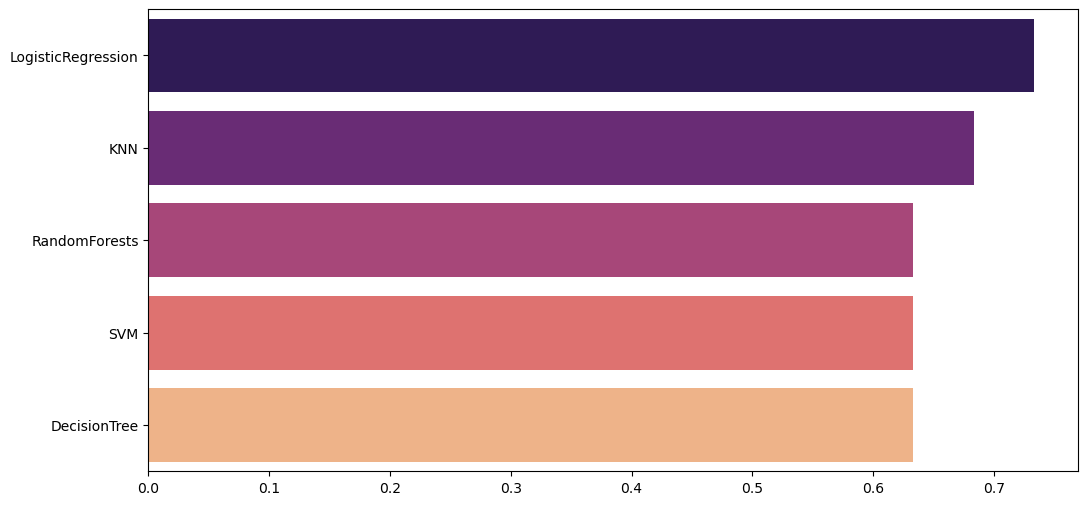

In [51]:
plt.figure(figsize=(12,6))
model_acc = [best_lr_random_acc, knn_model_acc, best_rfc_acc, svm_acc,accuracy]
model_name = ['LogisticRegression', 'KNN', 'RandomForests', 'SVM','DecisionTree' ]
sns.barplot(x= model_acc, y=model_name, palette='magma')

# 4. Interprétation	

##### La Régression Logistique a obtenu une précision de 73,33 %.
##### Le modèle des K Plus Proches Voisins (KNN) a obtenu une précision de 68,33 %.
##### Les Forêts Aléatoires (Random Forest Classifier) ont atteint une précision de 66,67 %.
##### Les Machines à Vecteurs de Support (SVM) ont obtenu une précision de 63,33 %.
##### Enfin, le modèle qui combine tous ces résultats a une précision de 63,33 %.
##### La Régression Logistique semble être le modèle le plus performant parmi ceux testés, suivie du KNN, des Forêts Aléatoires et des SVM. Cependant, il est important de prendre en compte d'autres métriques telles que la sensibilité, la spécificité ou encore l'aire sous la courbe ROC pour obtenir une évaluation plus complète de la performance de chaque modèle dans la détection des maladies cardiaques.